# Plot the model outputs

In [1]:
import pandas as pd
from simpler_mpl import set_common_mpl_styles
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import matplotlib.pyplot as plt
from simpler_pandas import apply_labelling, sanity_check, show_df_details
from labelling import format_to_base_10

In [2]:
uplift_result_file = "df_comparison_uplift.pickle"
df_comparison_uplift = pd.read_pickle(uplift_result_file)
churn_result_file = "df_comparison_churn.pickle"
df_comparison_churn = pd.read_pickle(churn_result_file)
dummy_result_file = "df_comparison_dummy.pickle"
df_comparison_dummy = pd.read_pickle(dummy_result_file)

df_to_plot = pd.concat((df_comparison_dummy, df_comparison_churn, df_comparison_uplift), axis=1)

def check_series_is_ordered(ser, ascending=True):
    """Check 1 series is ascending"""
    assert ascending==True, "Haven't done descending yet, nor tested this"
    return (ser.shift()[1:].reset_index(drop=True) >= ser[:-1].reset_index(drop=True)).all()

assert check_series_is_ordered(df_to_plot['churn_proba_pos'])
assert check_series_is_ordered(df_to_plot['dummy_proba_pos'])
assert check_series_is_ordered(df_to_plot['uplift_diff_t_c'])

df_to_plot

,dummy_proba_pos,dummy_will_churn,churn_proba_pos,churn_will_churn,uplift_diff_t_c,uplift_will_churn
0,0.16582,0,0.391900,0,-0.303179,0
1,0.16582,1,0.391900,0,-0.303179,0
2,0.16582,0,0.391900,0,-0.303179,0
3,0.16582,0,0.391900,0,-0.303179,0
4,0.16582,0,0.391900,0,-0.303179,0
...,...,...,...,...,...,...
49995,0.16582,1,0.025328,0,0.104621,0
49996,0.16582,0,0.025328,1,0.104621,1
49997,0.16582,1,0.025328,0,0.104621,0
49998,0.16582,0,0.025328,0,0.104621,1


In [3]:
sanity_check(df_to_plot)
show_df_details(df_to_plot)

is view False, is consolidated False, single block False, numeric mixed True
6 blocks looking like:
(NumericBlock: slice(0, 1, 1), 1 x 50000, dtype: float64, NumericBlock: slice(1, 2, 1), 1 x 50000, dtype: int64, NumericBlock: slice(2, 3, 1), 1 x 50000, dtype: float64, NumericBlock: slice(3, 4, 1), 1 x 50000, dtype: int64, NumericBlock: slice(4, 5, 1), 1 x 50000, dtype: float64, NumericBlock: slice(5, 6, 1), 1 x 50000, dtype: int64)


In [4]:
def calculate_value_generated(dfx, col_will_churn, model_name):
    # assume we're sorted
    #df_costing = dfx.sort_values(col, ascending=ascending).copy().reset_index(drop=True)
    df_costing = dfx[[col_will_churn]].copy()
    #df_costing['price_if_mktd'] = -1
    #df_costing['price_if_mktd_cumsum'] = df_costing['price_if_mktd'].cumsum()
    #df_costing['price_if_retained'] = 1000 * (df_costing[col_will_churn]==0)
    value_column = f"{model_name}_value"
    df_costing[value_column] = (1000 * (df_costing[col_will_churn]==0)) - 1
    value_column_cumsum = f"{model_name}_value_cumsum"
    df_costing[value_column_cumsum] = df_costing[value_column].cumsum()
    #return df_costing.rename(columns={'value_generated_cumsum': result_column})[[result_column]]
    return df_costing[[value_column, value_column_cumsum]]
    #return df_costing

df_costing_uplift = calculate_value_generated(df_to_plot, "uplift_will_churn", "uplift")
#df_costing.iloc[10000]
df_costing_uplift

,uplift_value,uplift_value_cumsum
0,999,999
1,999,1998
2,999,2997
3,999,3996
4,999,4995
...,...,...
49995,999,41547004
49996,-1,41547003
49997,999,41548002
49998,-1,41548001


In [5]:
df_costing_churn = calculate_value_generated(df_to_plot, "churn_will_churn", "churn")
#df_costing.iloc[10000]

In [6]:
df_costing_dummy = calculate_value_generated(df_to_plot, "dummy_will_churn", "dummy")
#df_costing.iloc[10000]

In [7]:
df_to_plot = pd.concat((df_costing_dummy, df_costing_churn, df_costing_uplift), axis=1)
df_to_plot

,dummy_value,dummy_value_cumsum,churn_value,churn_value_cumsum,uplift_value,uplift_value_cumsum
0,999,999,999,999,999,999
1,-1,998,999,1998,999,1998
2,999,1997,999,2997,999,2997
3,999,2996,999,3996,999,3996
4,999,3995,999,4995,999,4995
...,...,...,...,...,...,...
49995,-1,41546004,999,41546004,999,41547004
49996,999,41547003,-1,41546003,-1,41547003
49997,-1,41547002,999,41547002,999,41548002
49998,999,41548001,999,41548001,-1,41548001


In [8]:
#df_to_plot.iloc[100][['dummy_value_cumsum', 'churn_value_cumsum', 'uplift_value_cumsum']]

In [9]:
df_to_plot.sample(5).sort_index()

,dummy_value,dummy_value_cumsum,churn_value,churn_value_cumsum,uplift_value,uplift_value_cumsum
20154,999,16767845,999,15620845,999,18558845
32148,999,26727851,999,25727851,999,28659851
35106,-1,29210893,999,27893893,999,31162893
36114,999,30021885,999,28629885,999,32033885
41827,999,34763172,999,33502172,999,35972172


In [10]:
df_to_plot['dummy_value_cumsum'] = df_to_plot['dummy_value_cumsum'] / 1_000_000
df_to_plot['churn_value_cumsum'] = df_to_plot['churn_value_cumsum'] / 1_000_000
df_to_plot['uplift_value_cumsum'] = df_to_plot['uplift_value_cumsum'] / 1_000_000

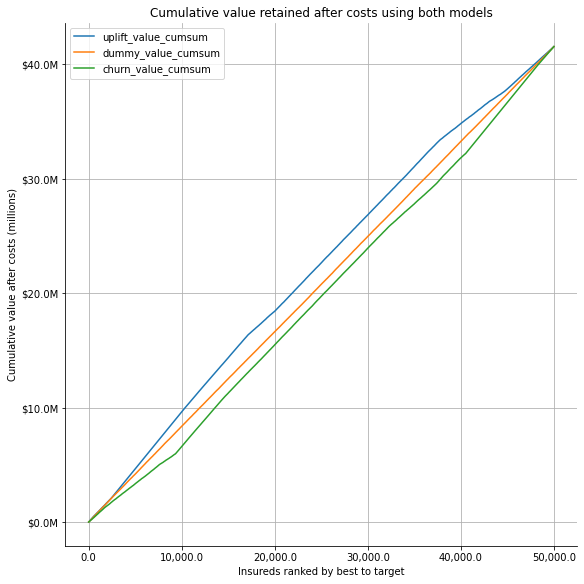

In [11]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))
df_to_plot[:50_000].plot(y=['uplift_value_cumsum', 'dummy_value_cumsum', 'churn_value_cumsum'], ax=ax);
title = "Cumulative value retained after costs using both models"
set_common_mpl_styles(ax, grid_axis="both", xlabel="Insureds ranked by best to target", 
                      ylabel="Cumulative value after costs (millions)", title=title)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:}M'))

In [12]:
#row_with_minimum_uplift_effect = (0 - df_to_plot['uplift_diff_t_c'].abs()).idxmax()
#print(f"At row {row_with_minimum_uplift_effect} we have the smallest uplift effect"
#     " so after this point we have a decreasing impact")
#df_to_plot.iloc[row_with_minimum_uplift_effect]

In [13]:
quantile = pd.cut(df_to_plot.index, 5, right=False)
quantile

[[0.0, 9999.8), [0.0, 9999.8), [0.0, 9999.8), [0.0, 9999.8), [0.0, 9999.8), ..., [39999.2, 50048.999), [39999.2, 50048.999), [39999.2, 50048.999), [39999.2, 50048.999), [39999.2, 50048.999)]
Length: 50000
Categories (5, interval[float64, left]): [[0.0, 9999.8) < [9999.8, 19999.6) < [19999.6, 29999.4) < [29999.4, 39999.2) < [39999.2, 50048.999)]

In [14]:
mean_result_by_quantile = df_to_plot.groupby(quantile)[['uplift_value', 'dummy_value', 'churn_value']].mean()
mean_result_by_quantile.index = apply_labelling(mean_result_by_quantile.index, format_to_base_10)
mean_result_by_quantile

,uplift_value,dummy_value,churn_value
[0.00 - 10.00k),964.2,837.2,660.3
[10.00k - 20.00k),878.5,826.7,888.9
[20.00k - 30.00k),842.2,832.4,844.5
[30.00k - 40.00k),797.7,830.3,789.0
[40.00k - 50.05k),672.3,828.3,972.2


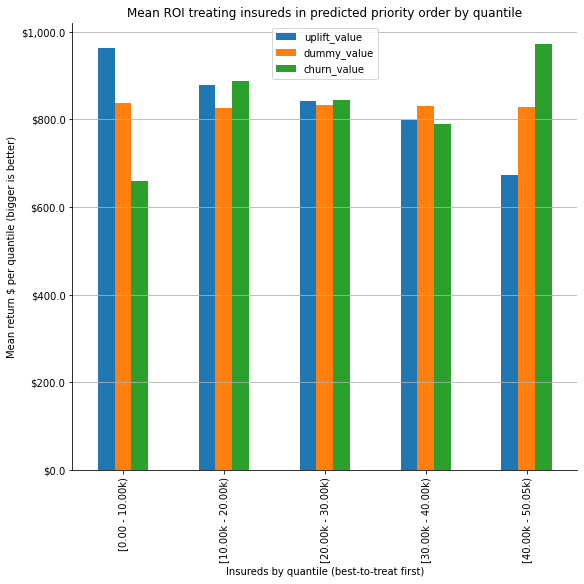

In [15]:
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
mean_result_by_quantile.plot(kind='bar', ax=ax)
title = "Mean ROI treating insureds in predicted priority order by quantile"
set_common_mpl_styles(ax, grid_axis="y", xlabel="Insureds by quantile (best-to-treat first)", title=title, ylabel="Mean return $ per quantile (bigger is better)")
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,}'))